# Predict Pneumonia from x-ray scans
Made by
- Yannick K. Hartington

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load dataset

In [4]:
target_size = (224, 224)
seed = 42
#path_dataset = r'/mnt/c/Datasets/Chest X-Ray Images/chest_xray' # WSL
path_dataset = r'C:\Datasets\Chest X-Ray Images\chest_xray' # Windows

In [5]:
# Pixel values are typically between 0 and 255 
# We would like to have them between 0 and 1
rescaling = 1./255 

In [6]:
train_datagen = ImageDataGenerator(
    rescale=rescaling,
    rotation_range=10,
    brightness_range=[0.7,1.3],
    )
train_generator = train_datagen.flow_from_directory(
    (path_dataset + '/train'),
    seed=seed,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    )

val_datagen = ImageDataGenerator(
    rescale=rescaling, 
)
validation_generator = val_datagen.flow_from_directory(
    (path_dataset + '/val'),
    seed=seed,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    )

test_datagen = ImageDataGenerator(
    rescale=rescaling, 
)
test_generator = test_datagen.flow_from_directory(
    (path_dataset + '/test'),
    seed=seed,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


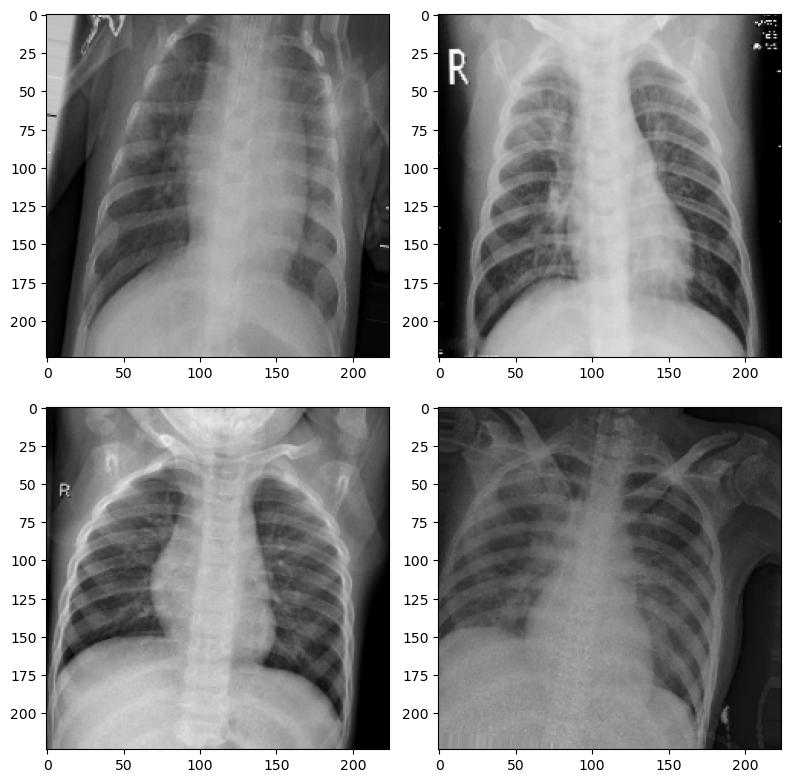

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        # Get the next image and label from the generator
        img, label = train_generator.next()
        axes[i, j].imshow(img[0])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## We would like to see, what the model is looking at to predict if the patient has pneumonia